<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_from_Scratch_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

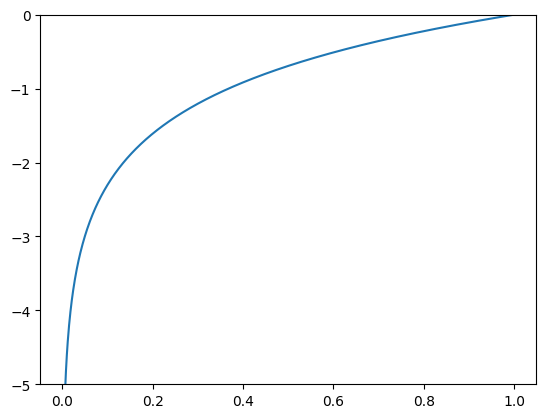

In [7]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

In [10]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))
#0.51082545709933802

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

미니배치: 훈련 데이터로부터 일부만 골라 학습을 수행

미니배치 학습: 60,000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장을 사용하여 학습

MNIST 데이터셋을 읽어오는 코드

In [28]:
from google.colab import drive
drive.mount('/content/drive')
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
from mnist import load_mnist
import numpy as np
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60000, 784)
(60000, 10)


In [30]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)

array([ 2951, 11109, 51213, 11865, 48740, 55650, 11424, 27397, 12310,
       42409])

In [32]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size



원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산은 무시해도 좋음

정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음

t * np.log(y) 부분을 np.log(y[np.arange(batch_size),t])로 구현

np.log(y[np.arange(batch_size),t] 설명

batch_size가 5면 np.arange(batch_size)는 [0, 1, 2, 3, 4]

t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장됨

y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출

y[np.arange(batch_size),t] = [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]] 인 넘파이 배열 생성

<ipython-input-33-0e84c3cc3e6e>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


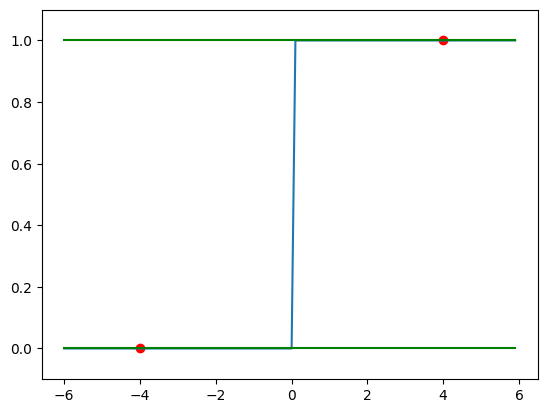

In [33]:
# 계산함수의 미분은 대부분의 장소(0 이외의 곳)에서 0.
# 그림 4-4 계단함수와 시그모이드 함수: 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = np.array([1 for _ in range(x.size)])
y3 = np.array([0 for _ in range(x.size)])
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[1,0],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

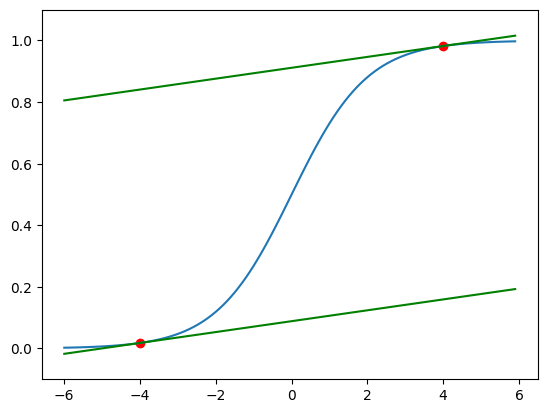

In [35]:
# 시그모이드 함수의 기울기(접선)은 0이 아니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def 시그모이드_접선(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(4)
y2 = a2 * x + b2
a3, b3 = 시그모이드_접선(-4)
y3 = a3 * x + b3
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[a2*4+b2,a3*-4+b3],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

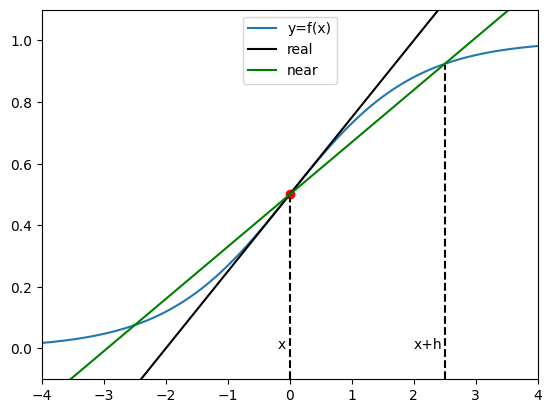

In [43]:
# 함수의 미분을 구하는 계산 파이썬 구현
# 그림 4-5 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.
# -*- coding: utf-8 -*-
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(0)
y2 = a2 * x + b2
a3 = (sigmoid(2.5) - sigmoid(0)) / 2.5
y3 = a3 * x + b2

plt.plot(x, y1, label='y=f(x)')
plt.plot(x, y2, color='black', label='real')
plt.plot(x, y3, color='green', label='near')
xv = np.arange(-0.1, 0.5, 0.01)
plt.text(-0.2,0,"x")
plt.plot(np.array([0 for _ in range(xv.size)]), xv, 'k--')
xhv = np.arange(-0.1, sigmoid(2.5), 0.01)
plt.text(2,0,"x+h")
plt.plot(np.array([2.5 for _ in range(xhv.size)]), xhv, 'k--')
plt.scatter([0],[b2],color='red')

plt.ylim(-0.1,1.1)
plt.xlim(-4,4)
plt.legend(loc='upper center')
plt.show()

위 그래프처럼 수치 미분에는 오차가 포함

중심차분, 중앙차분: 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 사용

전방차분: (x+h)와 x의 차분

위의 2가지 개선점을 적용한 수치 미분 구현

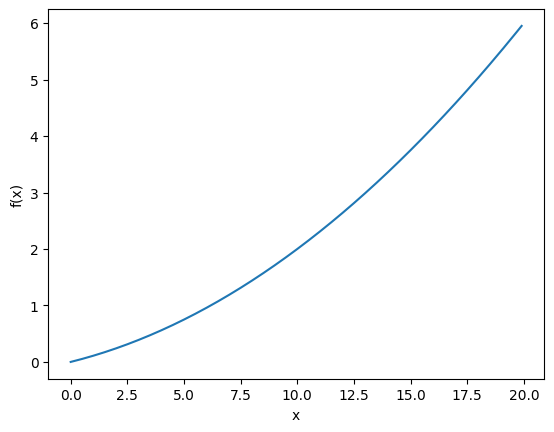

In [45]:
# 위의 2가지 개선점을 적용한 수치 미분 구현
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [46]:
numerical_diff(function_1, 5)

0.1999999999990898

In [47]:
numerical_diff(function_1, 10)

0.2999999999986347

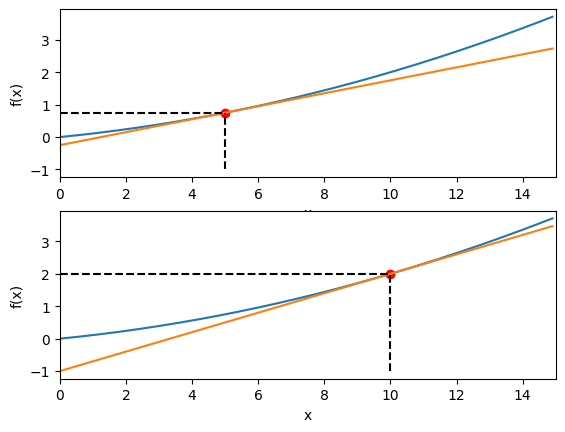

In [51]:
# 그림 4-7 x=5, x=10에서의 접선: 직선의 기울기는 수치 미분에서 구한 값을 사용하였다.
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_1d.py 소스 참고

def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

def draw(ax, x, y, line, tox, toy):
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.plot(x, y)
    ax.plot(x, line)
    h = np.arange(0, tox, 0.01)
    v = np.arange(-1, toy, 0.01)
    ax.plot(np.array([tox for _ in range(v.size)]), v, 'k--')
    ax.plot(h, np.array([toy for _ in range(h.size)]), 'k--')
    ax.scatter(tox,toy,color='red')
    ax.set_xlim([0,15])

x = np.arange(0.0, 15.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 10)
y3 = tf(x)

f, (ax1, ax2) = plt.subplots(2, 1)
draw(ax1, x, y, y2, 5, function_1(5))
draw(ax2, x, y, y3, 10, function_1(10))

In [55]:
# 편미분
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

#그래프로 그리기
# 그림 4-8 f(x0, x1) = x0**2 + x1**2 그래프
# 3차원 참고주소: https://www.datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

<Figure size 640x480 with 0 Axes>

In [56]:
# 문제 1: x0=3, x1=4일 때 x0에 대한 편미분을 구하라.

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [57]:
# 문제 2: x0=3, x1=4일 때 x1에 대한 편미분을 구하라.

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [58]:
# 기울기 구현
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

In [59]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [60]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [61]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

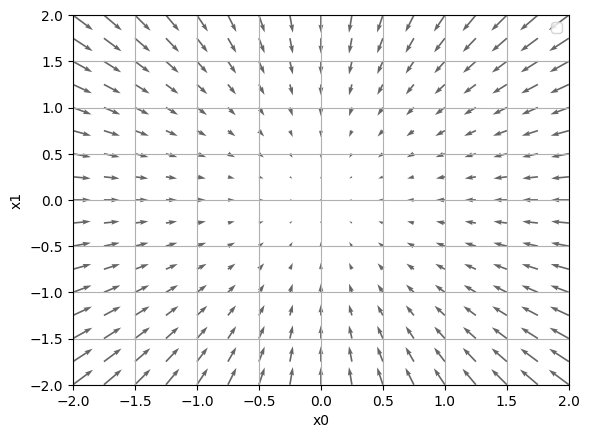

In [62]:
# 그림 4-9 f(x0, x1) = x0**2 + x1**2 의 기울기
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_2d.py 소스 참고
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [64]:
# 경사 하강법
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# 문제: 경사법으로 f(x0,x1) = x0 ** 2 + x1 ** 2의 최소값을 구하라.
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

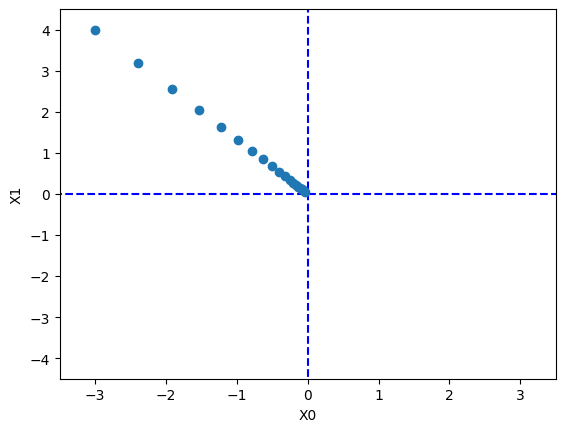

In [65]:
# 그림 4-10 f(x0, x1) = x0**2 + x1**2 의 갱신 과정 : 점선은 함수의 등고선을 나타낸다.
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch04/gradient_method.py 소스 참고
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [66]:
# 학습률이 너무 클 때와 작을 때 문제
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

# 학습률이 너무 큰 예 : lr=10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [67]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산함

학습률이 너무 작으면 거의 갱신되지 않은 채 끝남

하이퍼파라미터(hyper parameter, 초매개변수)

사람이 직접 설정해야 하는 매개변수. 시험을 통해 가장 잘 학습하는 값을 찾는 과정이 필요.

In [69]:
# 간단한 신경망에 대한 기울기를 구하는 코드
# https://github.com/WegraLee/deep-learning-from-scratch/blob/master/common/gradient.py 소스 참고
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [70]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.26704371  0.70230332 -0.63887133]
 [ 1.40521443 -0.41197855 -0.09781241]]


In [71]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.50446676  0.0506013  -0.47135397]


In [72]:
np.argmax(p) # 최대값의 인덱스

0

In [73]:
t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x,t)

0.6991546429239164

In [74]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.30179684  0.18940916  0.11238768]
 [-0.45269525  0.28411374  0.16858151]]
